In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('./cleaned_data.csv')
df.head(5)

,Name,Manufacturer,Brand,Condition,Price,Warranty_type,Warranty_time,Architecture,Max_resolution,Base_clock,...,Bus_width,Bandwidth,Cores,Length,Width,Height,Bus_interface,TDP,OpenGL,DirectX
0,RX570 PowerColor,Powercolor,AMD,Đã qua sử dụng,600000,Không có bảo hành,0,GCN 4.0,4096x2160,1168,...,256,224.0,2048,255.0,137.0,47.0,PCIe 3.0 x16,150,4.6,12
1,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4500000,Bảo hành hãng,2,RDNA 2.0,7680x4320,2375,...,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
2,RX 6700 XT MECH 2X OC,Msi,AMD,Đã qua sử dụng,4730000,Bảo hành hãng,12,RDNA 2.0,7680x4320,2375,...,192,384.0,2560,247.0,131.0,51.0,PCIe 4.0 x16,230,4.6,12 Ultimate
3,ASRock RX 6800,Asrock,AMD,Đã qua sử dụng,6450000,Không có bảo hành,0,RDNA 2.0,7680x4320,1700,...,256,512.0,3840,267.0,120.0,40.0,PCIe 4.0 x16,250,4.6,12 Ultimate
4,MSI RX 6650 XT 8gb OC,Msi,AMD,Đã qua sử dụng,6000000,Bảo hành hãng,34,RDNA 2.0,4096x2160,2055,...,128,280.3,2048,277.0,130.0,51.0,PCIe 4.0 x8,176,4.6,12 Ultimate


In [3]:
features = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col]) and col != 'Price']
features

['Warranty_time',
 'Base_clock',
 'Boost_clock',
 'Memory_clock',
 'Memory_size',
 'Bus_width',
 'Bandwidth',
 'Cores',
 'Length',
 'Width',
 'Height',
 'TDP',
 'OpenGL']

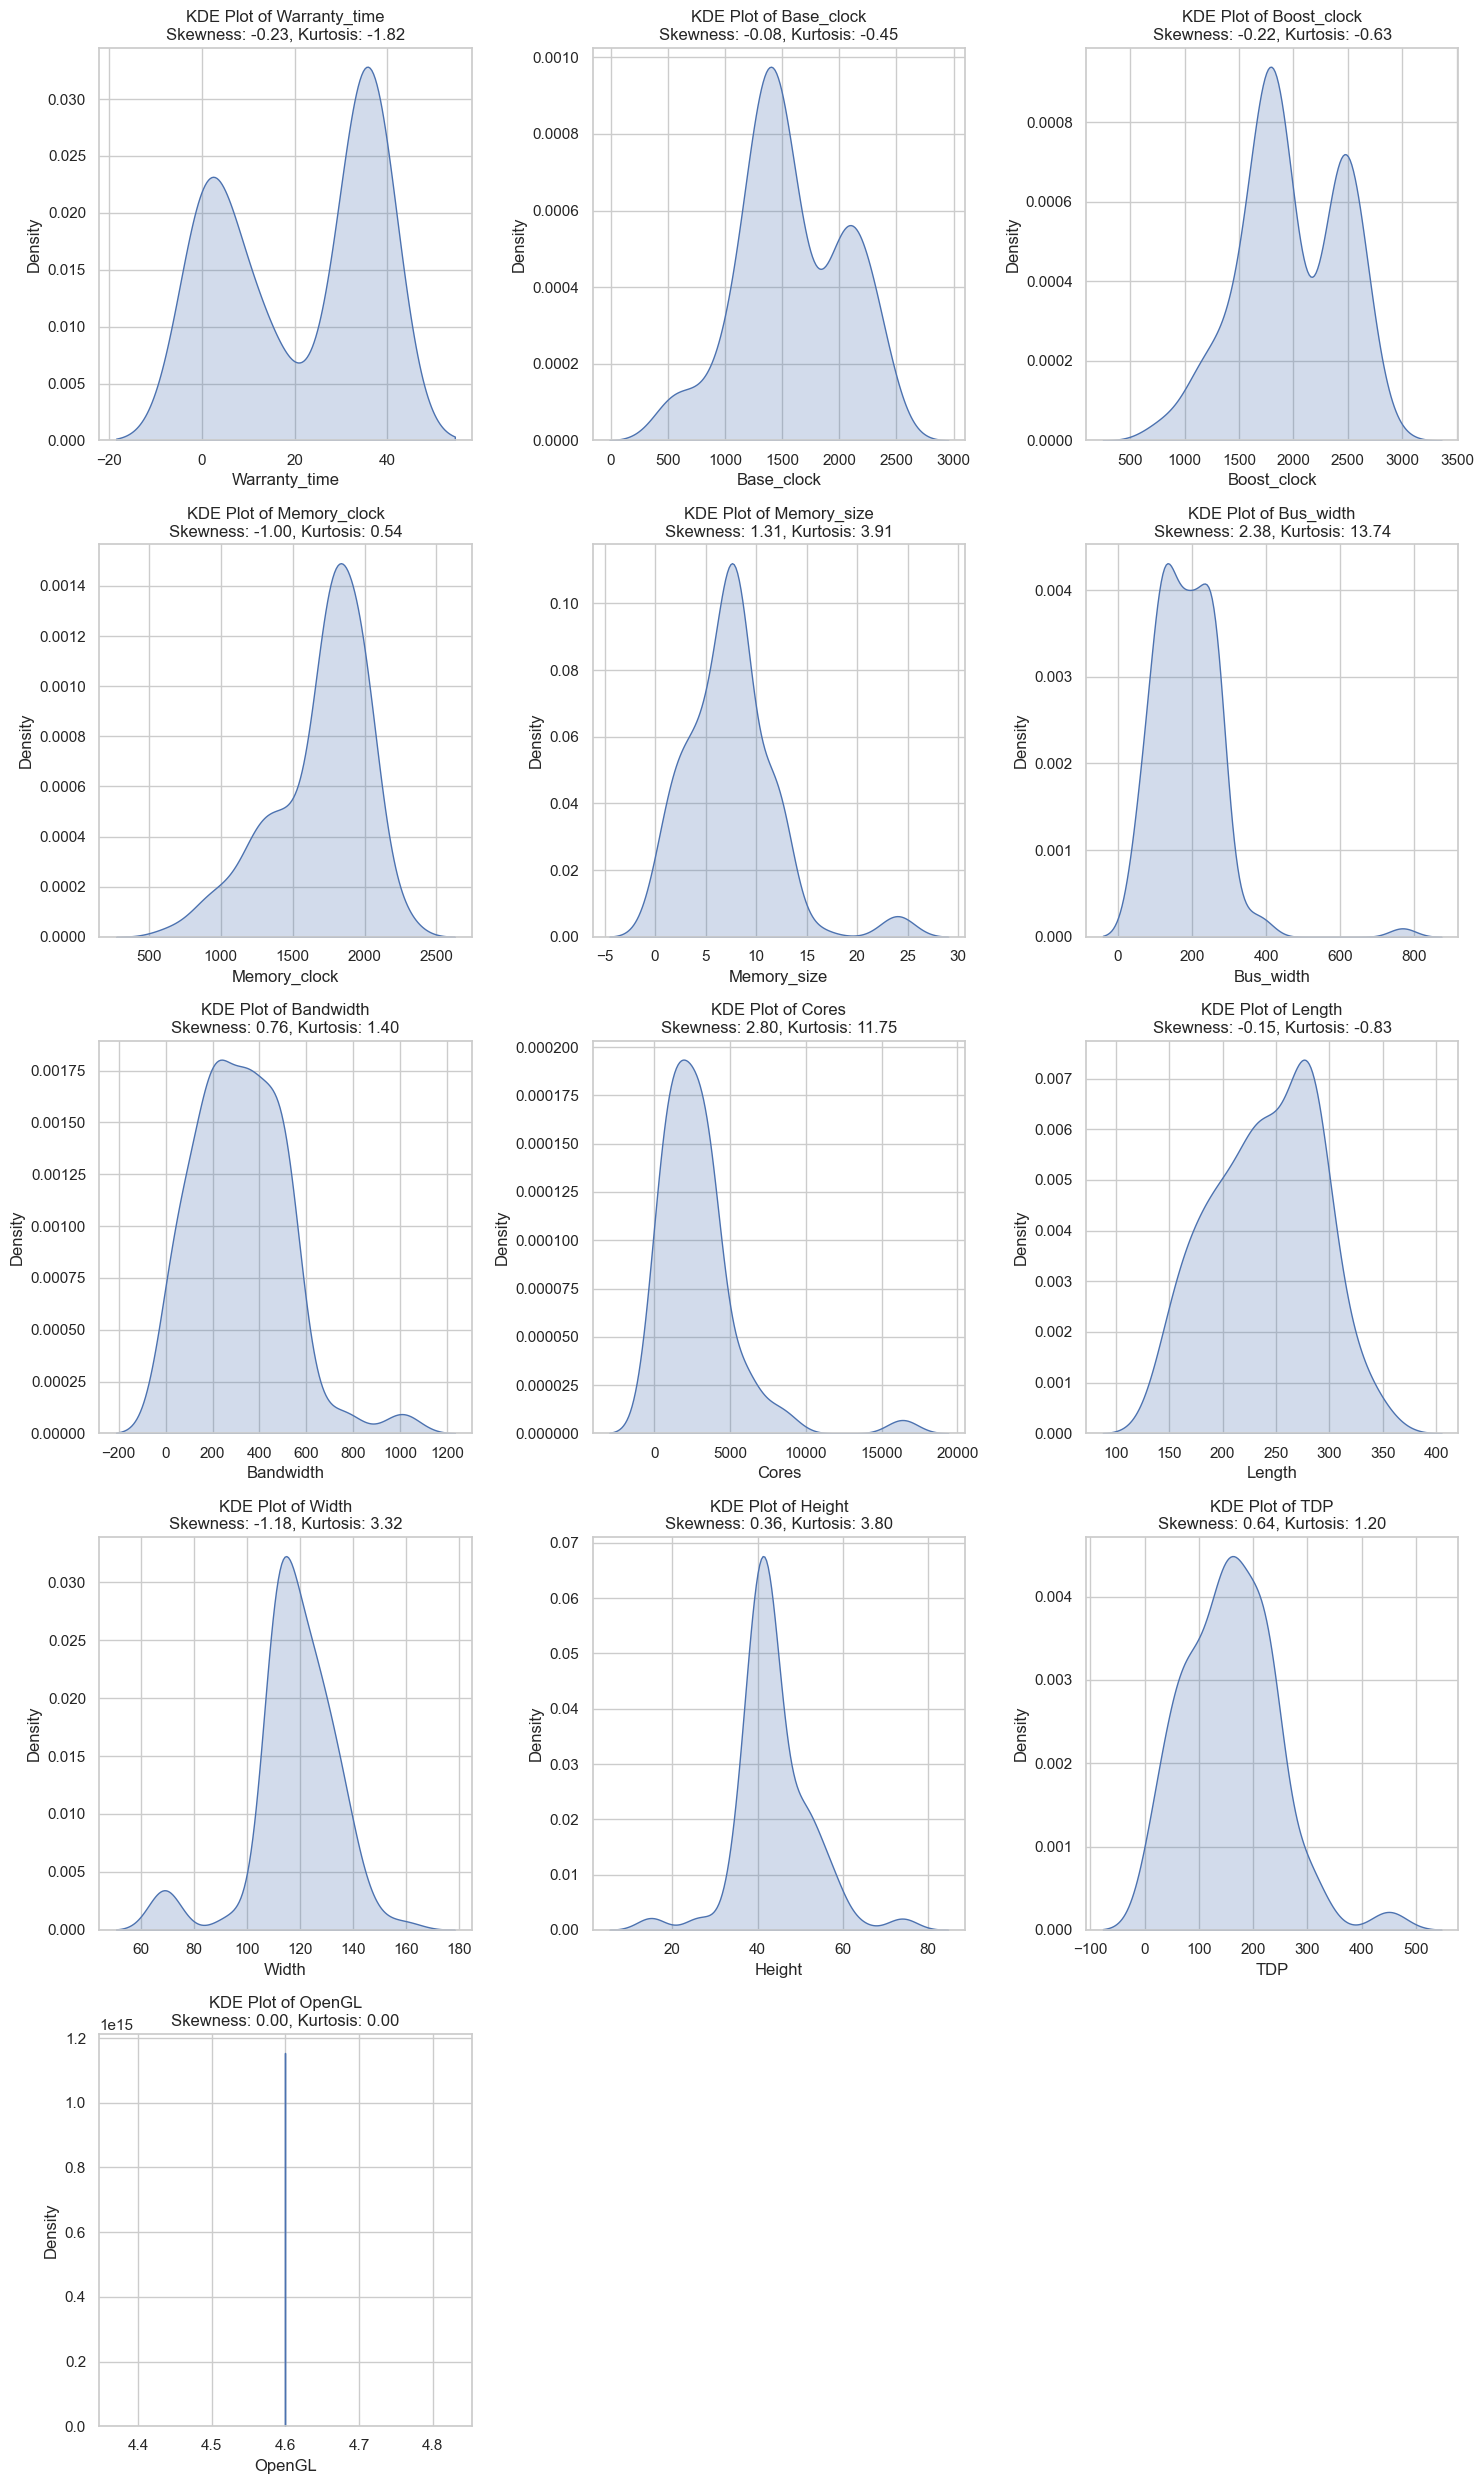

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def kdeplot_with_stats(df):
    sns.set(style='whitegrid')

    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        ax = axes[i // num_cols, i % num_cols]

        sns.kdeplot(df[feature], fill=True, ax=ax)
        ax.set_title(f'KDE Plot of {feature}\nSkewness: {df[feature].skew():.2f}, Kurtosis: {df[feature].kurtosis():.2f}')

    # Remove empty subplots if necessary
    if num_features < num_rows * num_cols:
        for i in range(num_features, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your DataFrame
kdeplot_with_stats(df)


In [5]:
import scipy.stats as stats


def checkPriceCorrelation(feature, df: pd.DataFrame):
    pearson, p_value = stats.pearsonr(df[feature], df['Price'])

    if (p_value < 0.05):
        return p_value, pearson
    return 0, 0

In [6]:
correlation_df = pd.DataFrame(columns=["feature-name", "pearson", "p_value", "correlation"])

correlation = "no correlation"

for feature_name in features:
    p_value, correlation_to_price = checkPriceCorrelation(feature_name, df)
    if p_value < 0.05:
        if 0.8 <= correlation_to_price <= 1:
            correlation = "large positive"
        elif 0.5 <= correlation_to_price < 0.8:
            correlation = "positive"
        elif -0.8 >= correlation_to_price >= -1:
            correlation = "large negative"
        elif -0.5 >= correlation_to_price > -0.8:
            correlation = "negative"
        else:
            correlation = "no correlation"
    else: 
        correlation = "no correlation"
    feature_result = pd.DataFrame({"feature-name": [feature_name], "pearson": [correlation_to_price], "p_value": [p_value], "correlation": [correlation]})

    # Concatenate the feature result to the results DataFrame
    correlation_df = pd.concat([correlation_df, feature_result], ignore_index=True)

print(correlation_df)

     feature-name   pearson       p_value     correlation
0   Warranty_time  0.432326  1.401109e-06  no correlation
1      Base_clock  0.360347  7.627125e-05  no correlation
2     Boost_clock  0.313154  6.552706e-04  no correlation
3    Memory_clock  0.000000  0.000000e+00  no correlation
4     Memory_size  0.691851  1.116480e-17        positive
5       Bus_width  0.409635  5.467880e-06  no correlation
6       Bandwidth  0.709036  7.542367e-19        positive
7           Cores  0.904742  1.085625e-43  large positive
8          Length  0.549826  1.962730e-10        positive
9           Width  0.434654  1.211495e-06  no correlation
10         Height  0.647530  5.267516e-15        positive
11            TDP  0.696871  5.181855e-18        positive
12         OpenGL  0.000000  0.000000e+00  no correlation


C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\1646805844.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_df = pd.concat([correlation_df, feature_result], ignore_index=True)
d:\Documents\Nam_4\Ky_1\Phan tich du lieu\Du_doan_gia_VGA\venv\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


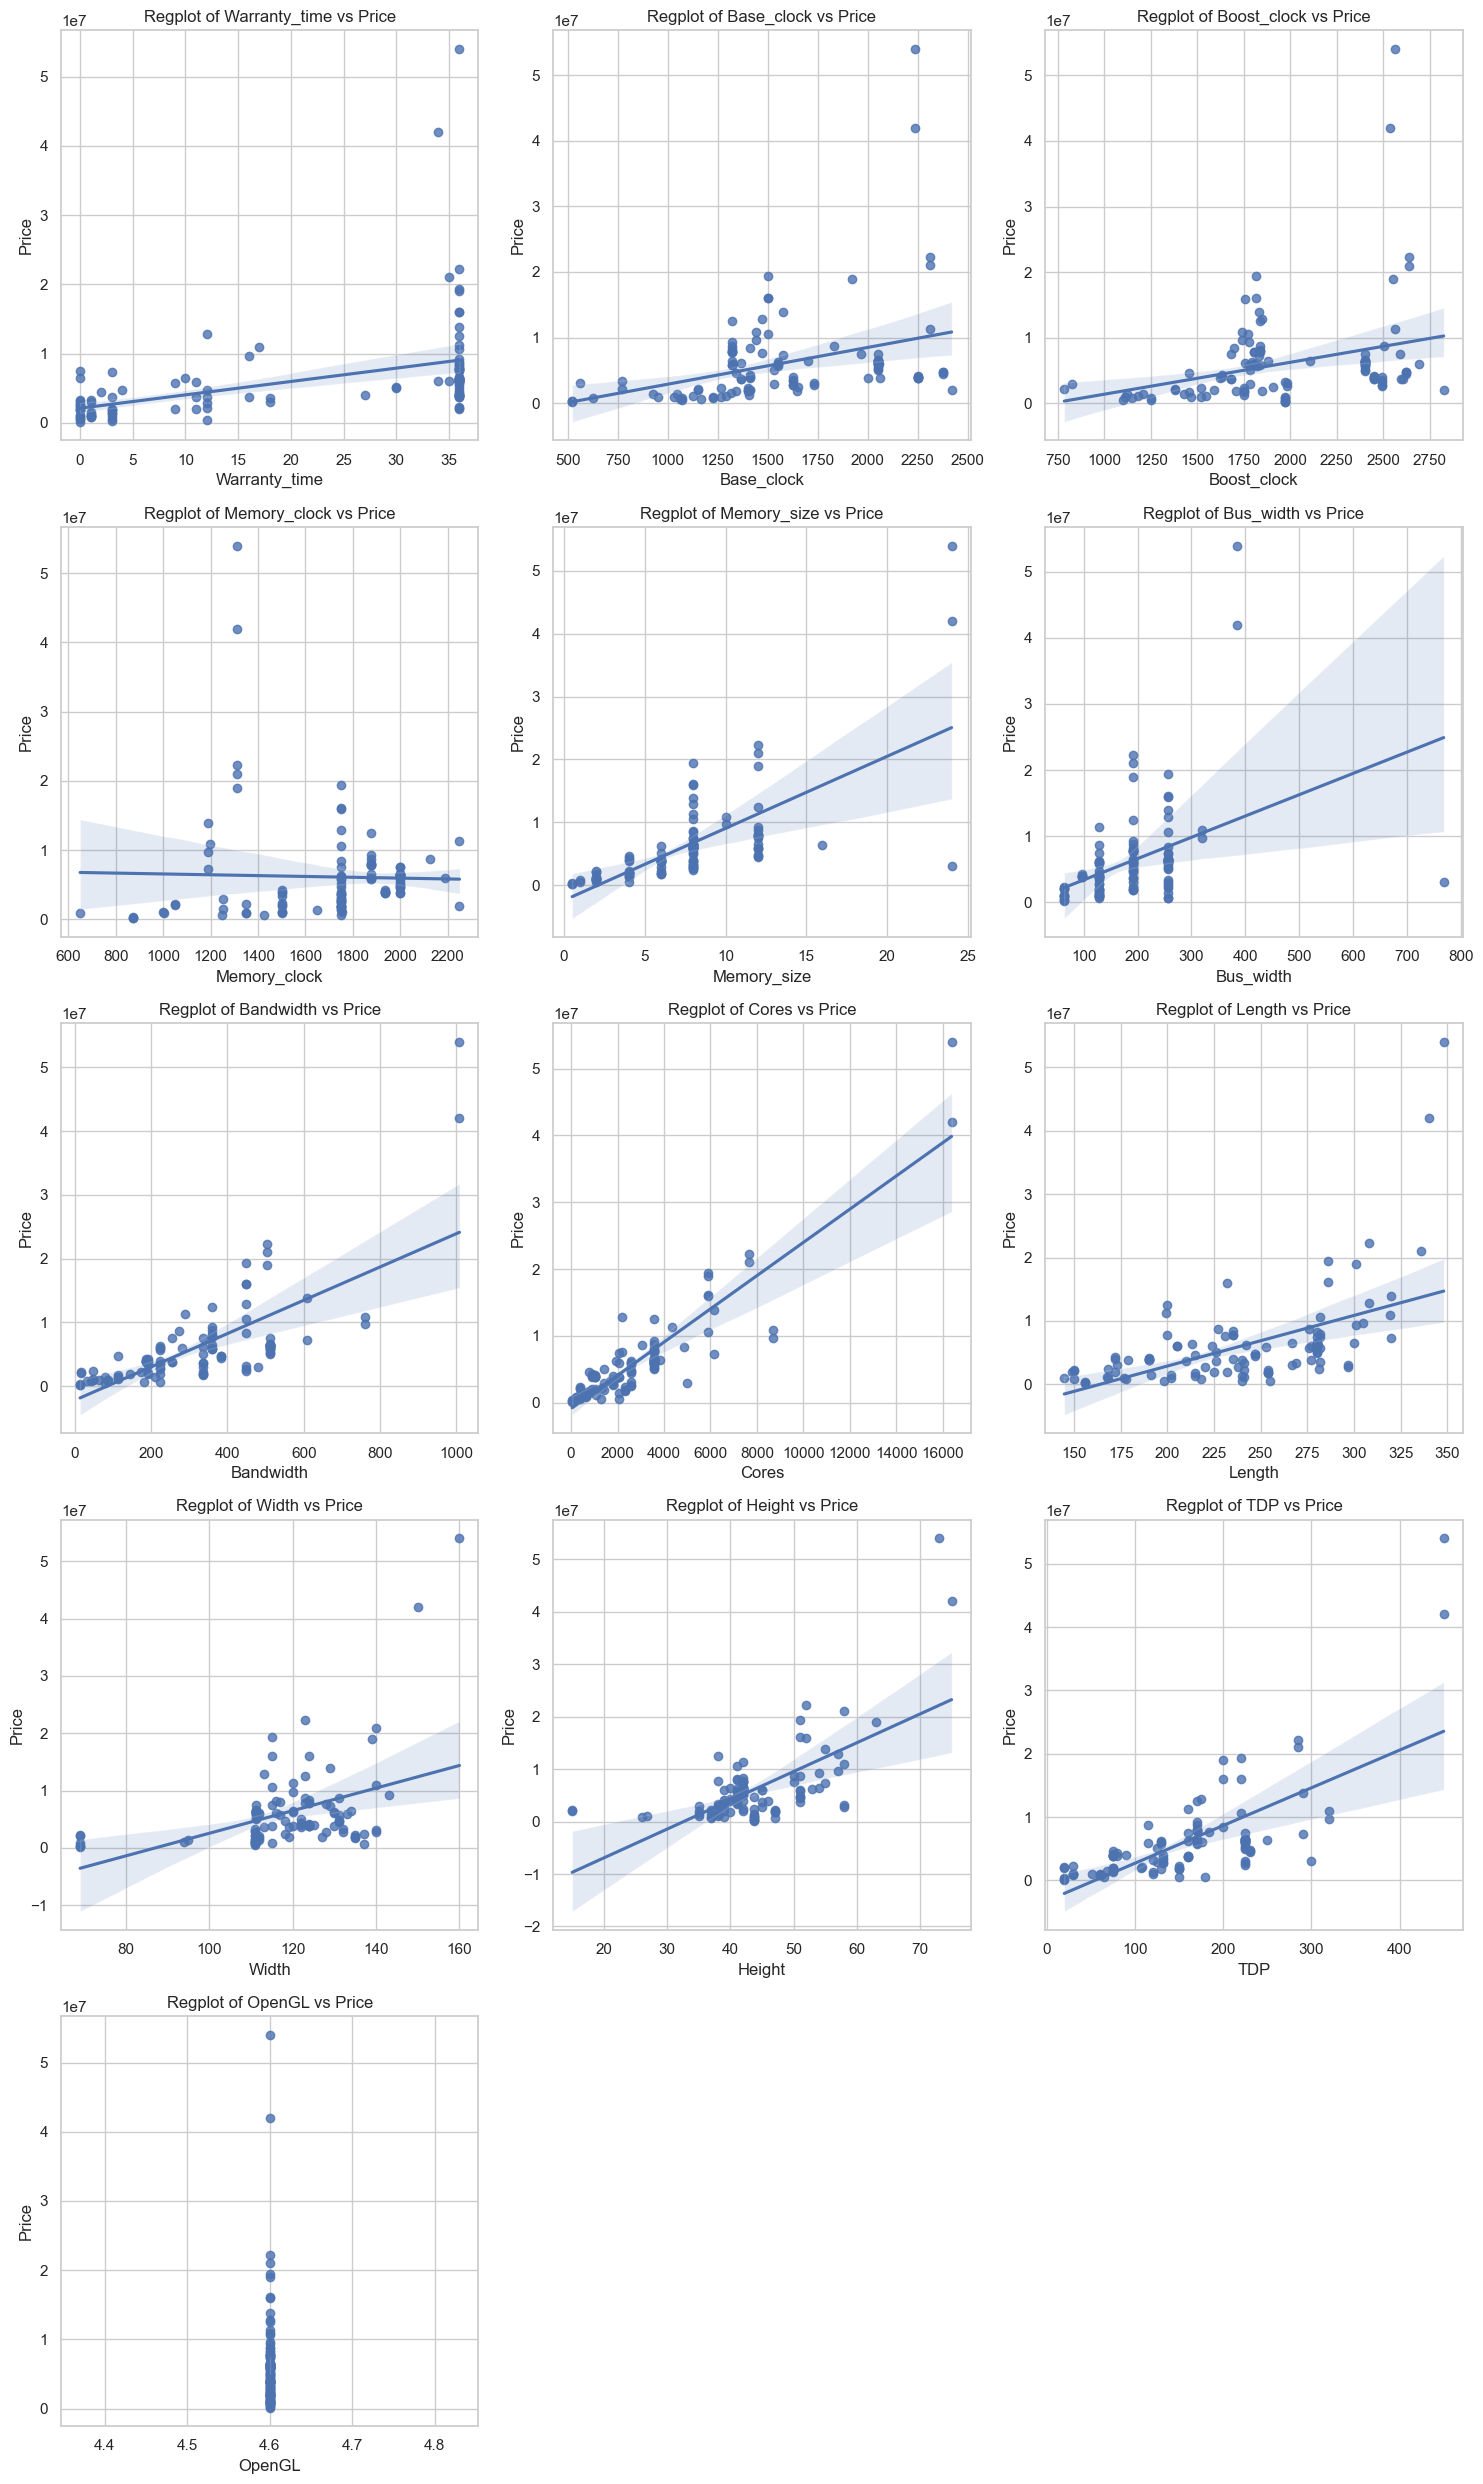

In [7]:
def regplot_with_price(df):
    # Set the style of the plots
    sns.set(style='whitegrid')

    # Create subplots to display multiple regplots
    num_features = len(features)
    num_cols = 3
    num_rows = (num_features + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, feature in enumerate(features):
        ax = axes[i // num_cols, i % num_cols]

        # Create a regplot for each feature
        sns.regplot(x=feature, y='Price', data=df, ax=ax)
        ax.set_title(f'Regplot of {feature} vs Price')

    # Remove empty subplots if necessary
    if num_features < num_rows * num_cols:
        for i in range(num_features, num_rows * num_cols):
            fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

regplot_with_price(df)


Danh sách các biến số ảnh hưởng đến giá VGA:
- Memory_size
- Cores
- Bandwidth
- TDP
- Length

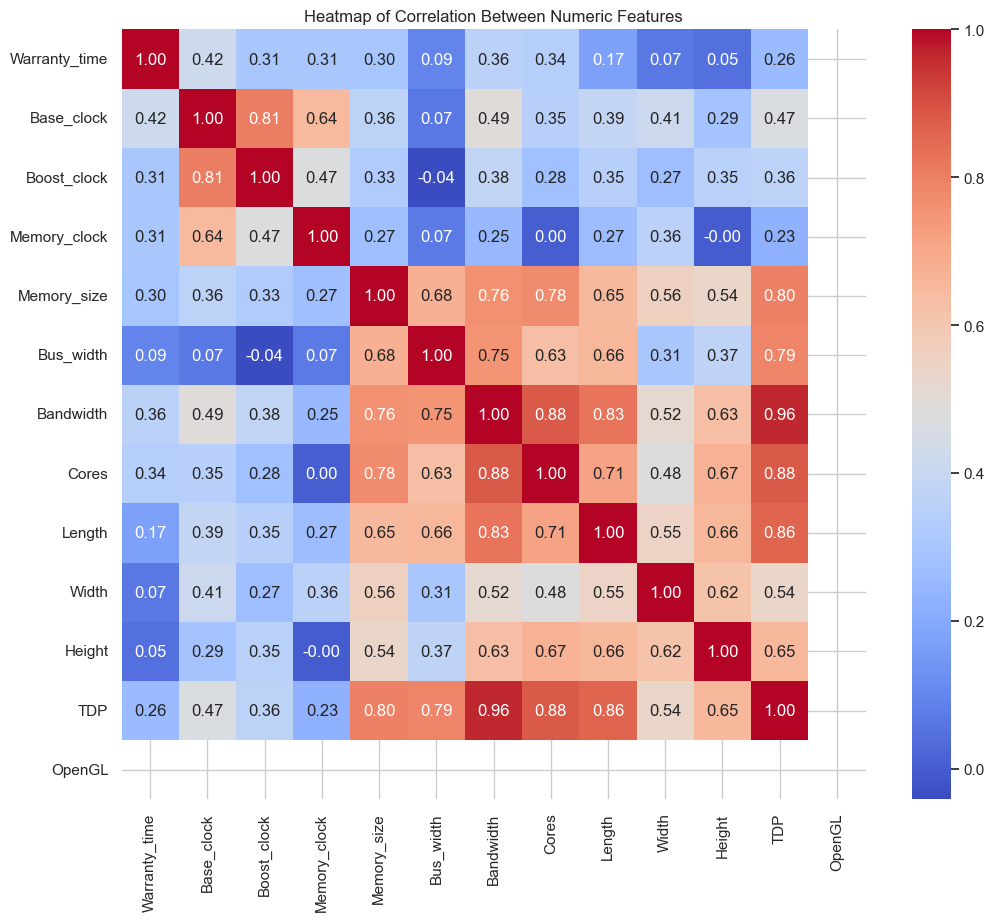

In [9]:
numeric_df = df[features]

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numeric Features')
plt.show()

In [11]:
categorical_features = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col]) and col != 'Name']
categorical_features

['Manufacturer',
 'Brand',
 'Condition',
 'Warranty_type',
 'Architecture',
 'Max_resolution',
 'Memory_type',
 'Bus_interface',
 'DirectX']

In [12]:
from scipy.stats import f_oneway

def categorical_price_correlation(df, categorical_features, target_column='Price'):
    anova_results = {}

    for feature in categorical_features:
        if pd.api.types.is_numeric_dtype(df[feature]):
            raise ValueError(f"The specified column '{feature}' is not categorical.")

        levels = len(df[feature].unique())
        if levels < 2:
            raise ValueError(f"The specified categorical feature '{feature}' must have at least two levels.")

        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*[df[df[feature] == unique][target_column] for unique in df[feature].unique()])
        anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}
    
    return anova_results



anova_results = categorical_price_correlation(df, categorical_features)

categorical_correlation_df = pd.DataFrame(columns=["feature-name", "F-statistic", "p_value", "correlation"])


for feature, results in anova_results.items():
    if results['p-value'] < 0.05:
        feature_result = pd.DataFrame({"feature-name": [feature], "F-statistic": [results['F-statistic']], "p_value": [results['p-value']], "correlation": "correlation"})
        categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)
    else:
        feature_result = pd.DataFrame({"feature-name": [feature], "F-statistic": [results['F-statistic']], "p_value": [results['p-value']], "correlation": "no correlation"})
        categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)

categorical_correlation_df

C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\2693525933.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  categorical_correlation_df = pd.concat([categorical_correlation_df, feature_result], ignore_index=True)


,feature-name,F-statistic,p_value,correlation
0,Manufacturer,2.443540,1.163155e-02,correlation
1,Brand,2.934810,5.724052e-02,no correlation
2,Condition,12.648105,5.504360e-04,correlation
3,Warranty_type,9.663478,1.343977e-04,correlation
4,Architecture,11.916897,1.015748e-15,correlation
5,Max_resolution,3.134052,4.745380e-03,correlation
6,Memory_type,28.212324,3.945918e-16,correlation
7,Bus_interface,5.546195,1.369666e-04,correlation
8,DirectX,28.450545,4.995360e-07,correlation


C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\4210390458.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickla

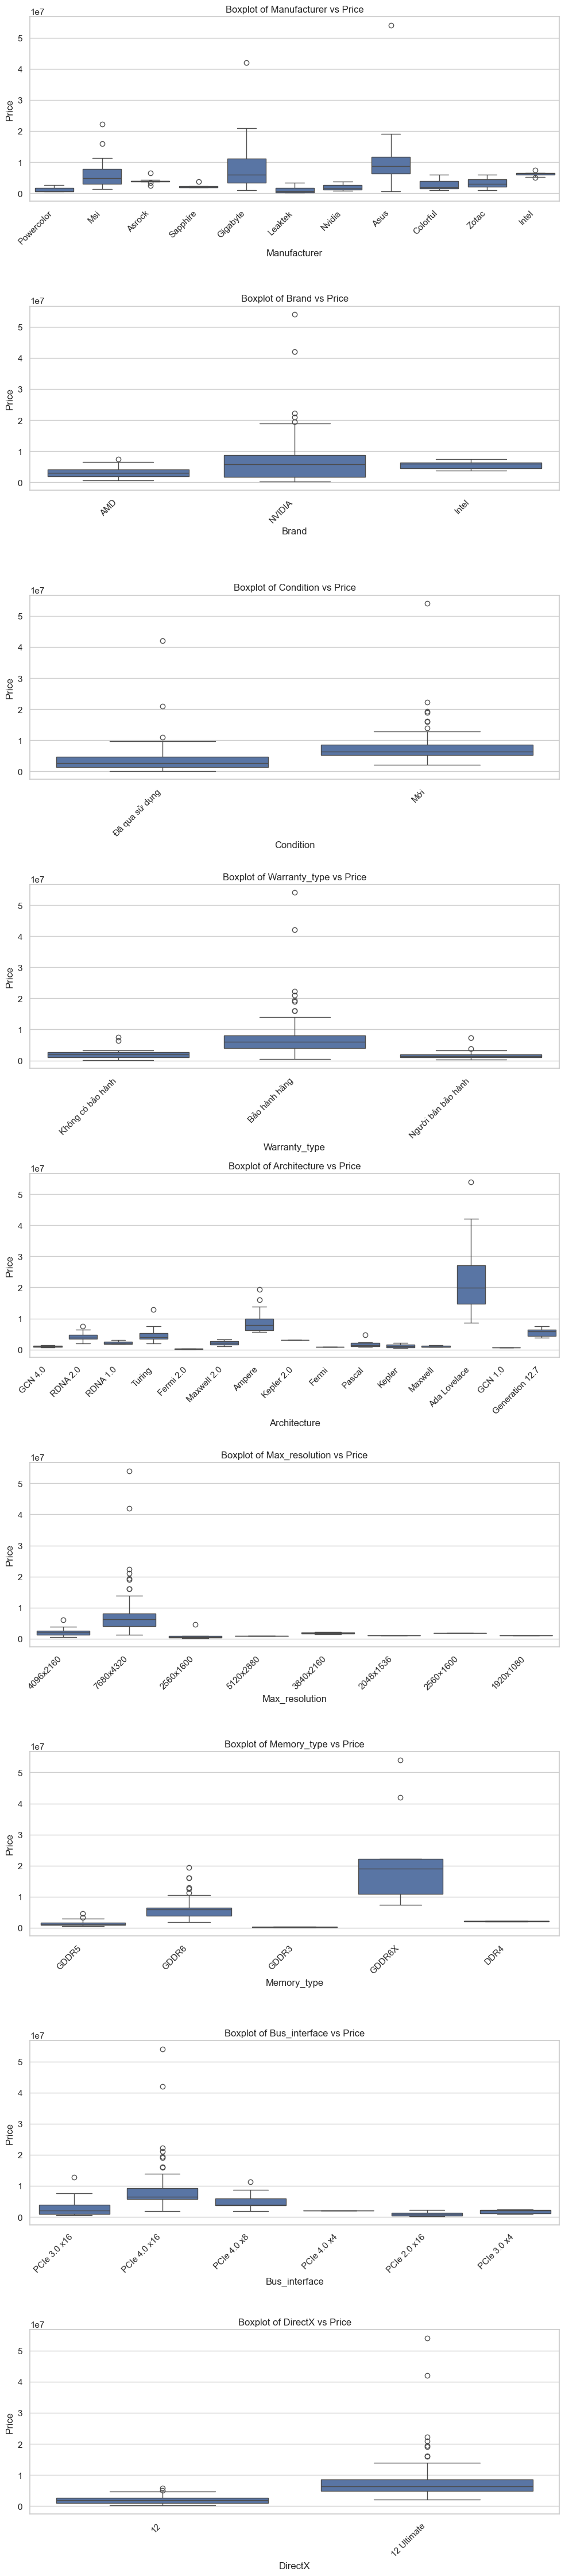

In [13]:
def plot_categorical_correlation(df, categorical_features):
    fig, axes = plt.subplots(len(categorical_features), 1, figsize=(10, 5 * len(categorical_features)))

    for i, feature in enumerate(categorical_features):
        ax = axes[i]
        sns.boxplot(x=feature, y='Price', data=df, ax=ax)
        ax.set_title(f'Boxplot of {feature} vs Price')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_categorical_correlation(df, categorical_features)

Ngoại trừ Brand với độ chênh lệch giữa các khoảng giá trị nhỏ thì các biến phân loại sau đều ảnh hưởng đến giá VGA:
- Manufacturer
- Architecture
- Max_resolution
- Memory_type
- Bus_interface
- DirectX

C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\1429916672.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_feature, y=y_feature, data=mean_price_by_group, ax=axes[i], palette=sns.color_palette("Set1"))
C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\1429916672.py:21: UserWarning: 
The palette list has fewer values (9) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=group_feature, y=y_feature, data=mean_price_by_group, ax=axes[i], palette=sns.color_palette("Set1"))
C:\Users\lthan\AppData\Local\Temp\ipykernel_15948\1429916672.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_feature, y=y_feature, data=mean_price_by_group

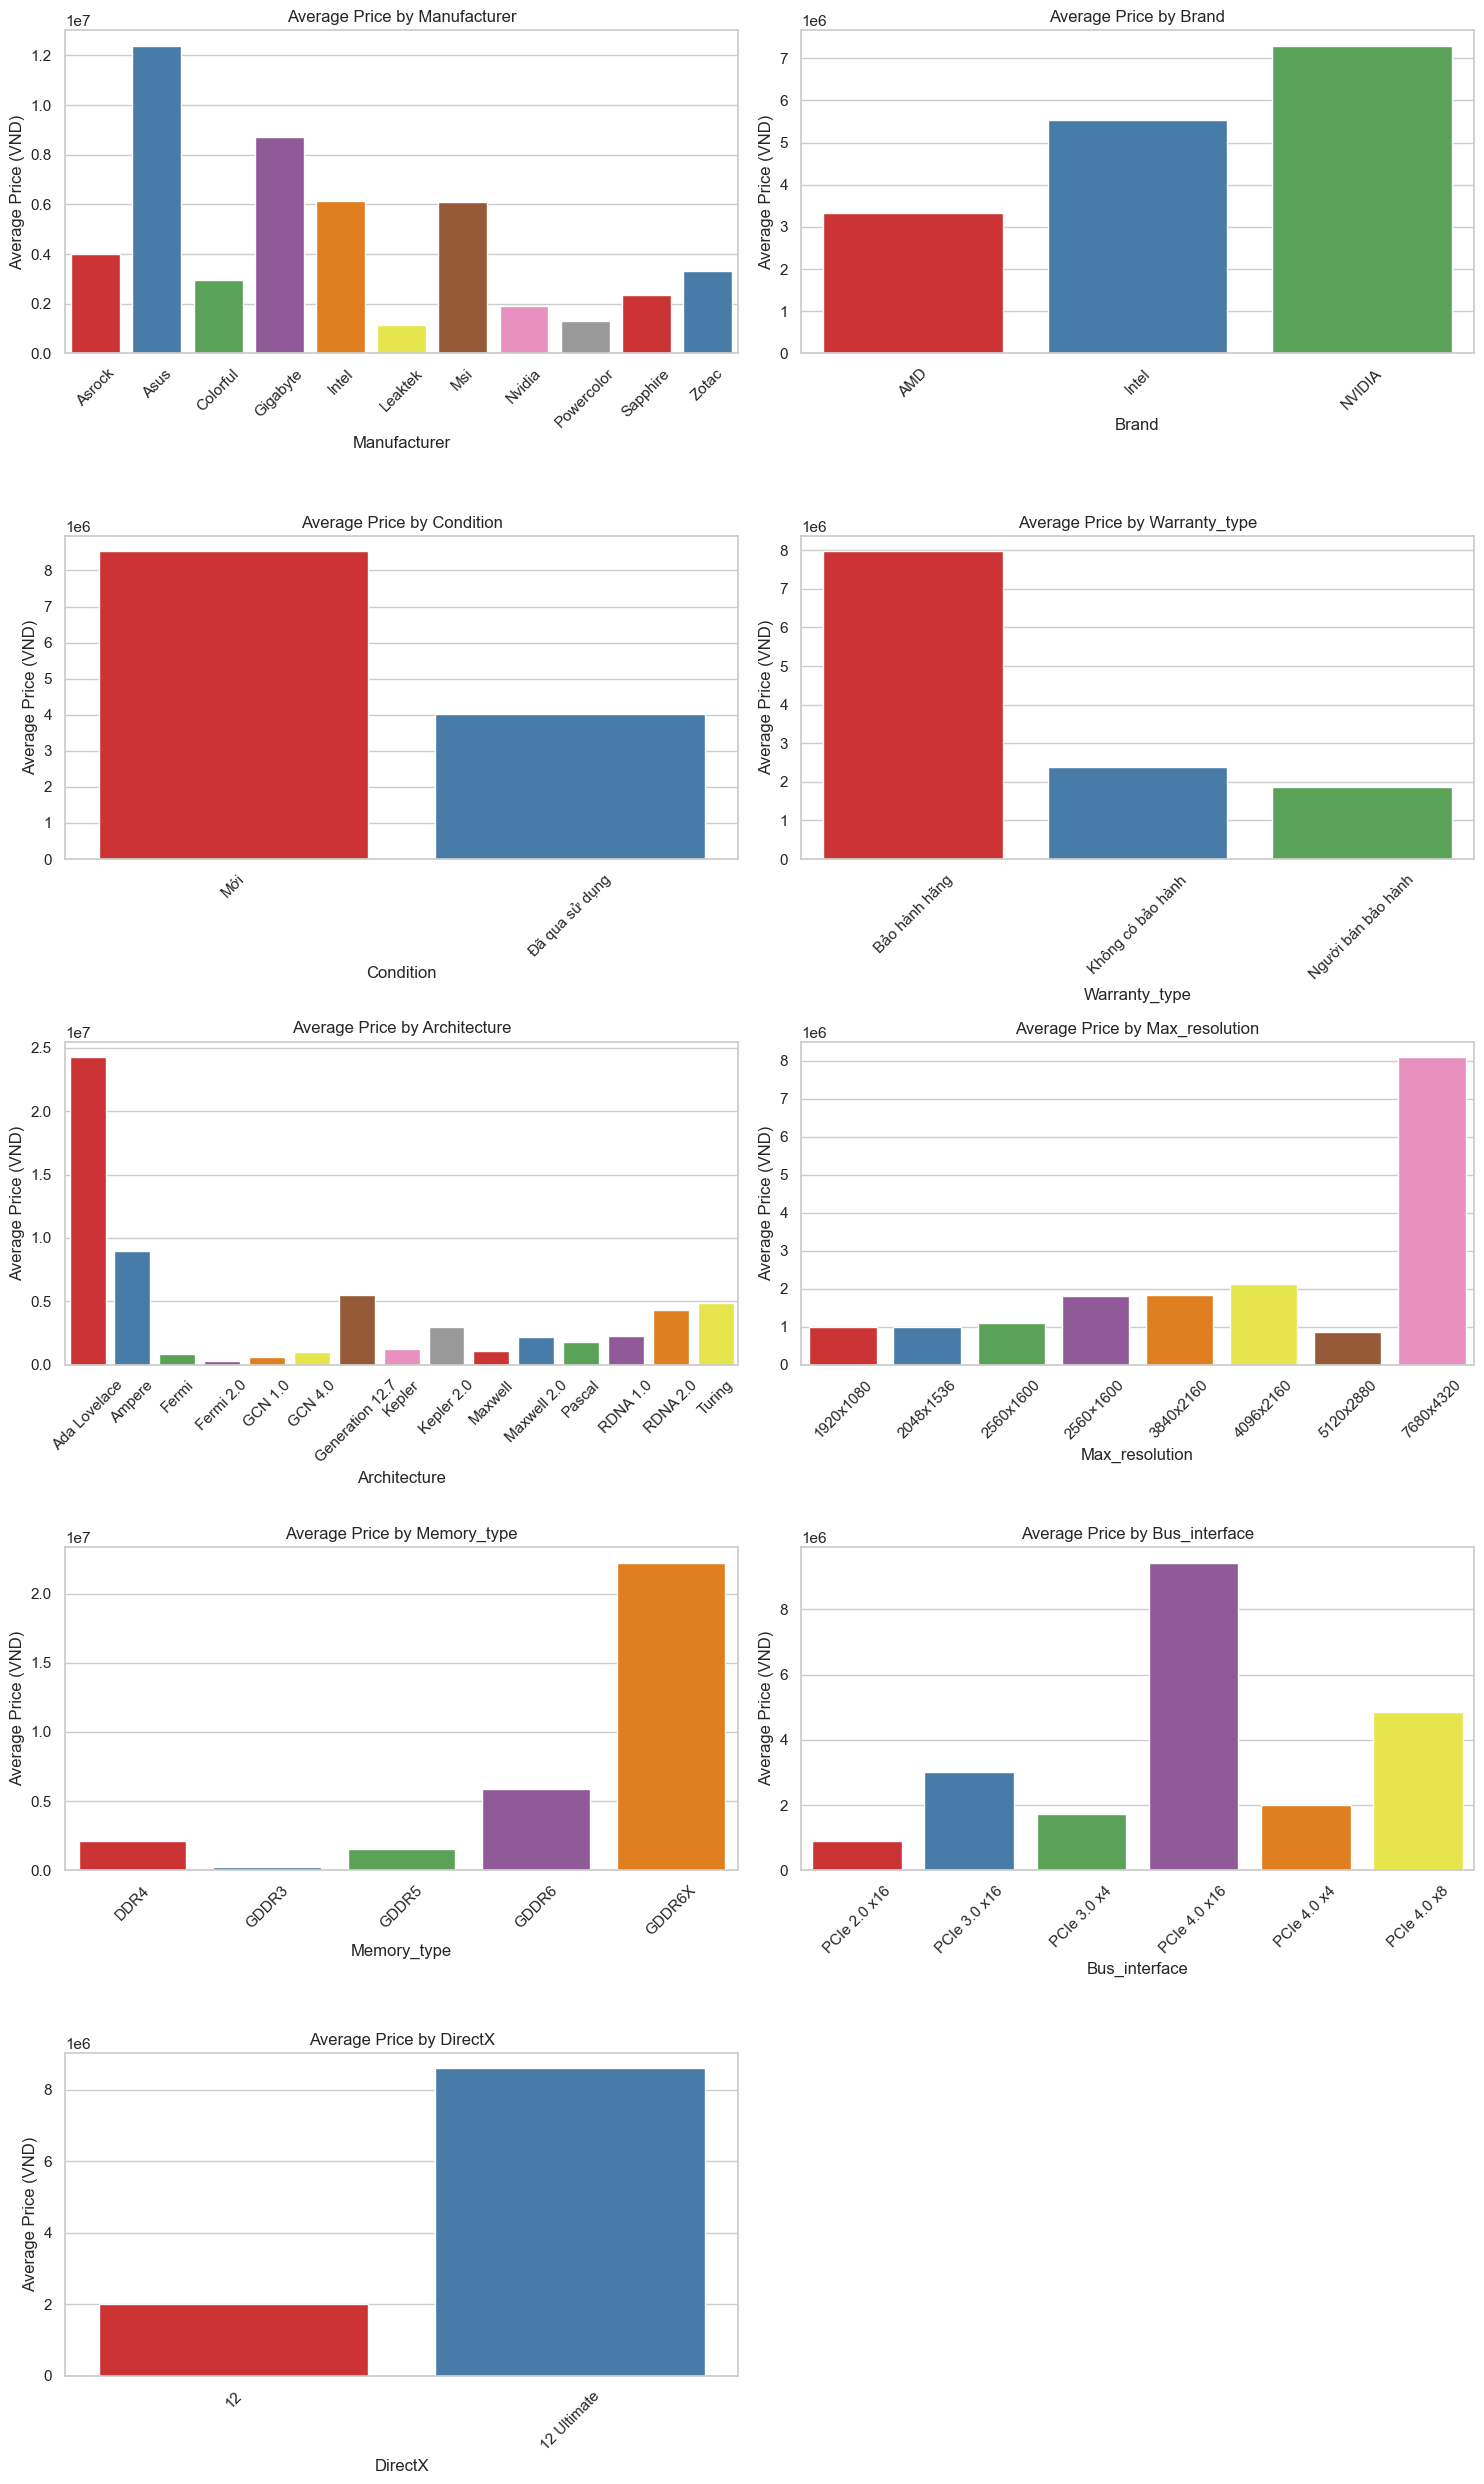

In [22]:
def plot_mean_price_for_features(df, group_features, y_feature):
    num_rows = (len(group_features) + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

    axes = axes.flatten()

    for i, group_feature in enumerate(group_features):
        mean_price_by_group = df.groupby(group_feature)[y_feature].mean().reset_index()

        sns.barplot(x=group_feature, y=y_feature, data=mean_price_by_group, ax=axes[i], palette=sns.color_palette("Set1"))
        axes[i].set_title(f'Average {y_feature} by {group_feature}')
        axes[i].set_xlabel(group_feature)
        axes[i].set_ylabel(f'Average {y_feature} (VND)')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(len(group_features), len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better display
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage:
plot_mean_price_for_features(df, categorical_features, 'Price')